Stitch Fix, Jupyter, Github, and the Long Tail
==

At Stitch Fix we are avid users of Jupyter for research at both the personal and team scales. At the personal level, Jupyter is a great interface to research the question at hand. It captures the workflow of the research where we can take detailed notes on the code and explain models with written content and mathematical equations. 

At the team level, Jupyter is a great tool for communication. Notebooks allow one to fluidly mix text, code, equations, data, and plots in whatever way makes the most sense to explain something. You can organize your explanation around your thought process rather than around the artificial lines determined by the tools you’re using.  You have a single Jupyter notebook instead of a bunch of disconnected files, one containing SQL code, another Python, a third LaTeX to typeset equations.

When the analysis is finished, the Jupyter notebook remains a “living” interactive research notebook.  Re-doing the analysis using new data or different assumptions is simple.

Stitch Fix provides clothing to its clients based on their style preferences.  We send a client five pieces of clothing we predict they’ll like, and the client chooses what to keep. Inevitably, some pieces of clothing will be more popular than others. In some cases, a few select items may be unpopular. 

The largest benefit from adding a single style of clothing to our line of inventory comes from the most popular one. Each of the less popular styles, by itself, contributes less.  However, there are *many* of the less popular ones, reflecting the fact that our clients are unique in their fashion preferences. Together, the value in the "long tail" can match or exceed the value of the few products in the "head."  Catering to the long tail allows us to save our clients the time they would otherwise spend searching through many retail stores to find clothing that’s unique to their tastes.

But, where do we draw the line on how far into the long tail we should support? Below we investigate this question using the Jupyter Notebook. The portability and flexibility of the Notebooks allows us to easily share the analysis with others.  Github integration allows a great new possibility: other researches can fork the notebook to extend or alter the analysis according to their own particular interests!

Is the value in the head or the tail?
--

We will approximate the number of each style of clothing sold as a power law of the sales rank $r$.  The most popular style has $r=1$, the second most popular $r=2$, and the least popular has $r=N$.  Consumer preferences dictate the shape of the curve. 

Even though we may want to carry an infinite number of styles of clothing, it's important to keep $N$ finite so that the integrals converge!  For the moment we will consider a scaled-down version of Stitch Fix that only carrys 100 styles of clothing and sells a volume of $V=5,000$ units per year.

The volume of each style sold is
\begin{equation}
v(r) = \frac{A}{r^n}
\end{equation}
where $A$ is a normalization constant and $n$ is the index of the power law.  The value of $n$ will determine how much value is in the head versus the tail.

Approximating the product distribution as continuous so it can be written as an integral, the normalization constant is set by the constraint
\begin{equation}
\int_1^N \frac{A\,dr}{r^n} = V
\end{equation}
so
\begin{equation}
A = \frac{(n-1) V}{1-N^{1-n}} 
\end{equation}


In [1]:
%matplotlib inline
import numpy as np
import pylab as pl
import seaborn

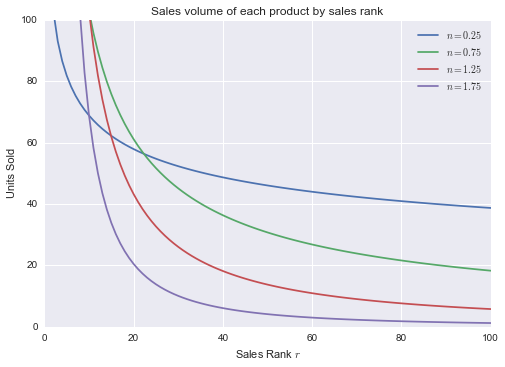

In [25]:
inventory = 100.0
volume = 5000.0

rr = np.linspace(1,inventory,100)
ns = [0.25, 0.75, 1.25, 1.75]

for nn in ns:
    norm = (nn-1)*volume/(1-inventory**(1-nn))
    pl.plot(rr, norm/rr**nn, label='$n=%g$' % nn)

pl.ylim(0,100)
pl.legend()
pl.xlabel('Sales Rank $r$')
pl.ylabel('Units Sold')
pl.title('Sales volume of each product by sales rank')

All of these distributions have the same area under the curve, so they represent the same total number of units sold.  Smaller values of $n$ give flatter distributions (less head, more tail) and larger values of $n$ give more head-heavy distributions.

What is the _total_ value in the head versus the tail?  Define the head to be the 10% of styles with the largest sales volume, the tail to be the 50% of styles with the lowest sales volumes, and the middle to be those in between.

That is, the head, tail, and middle look like this:

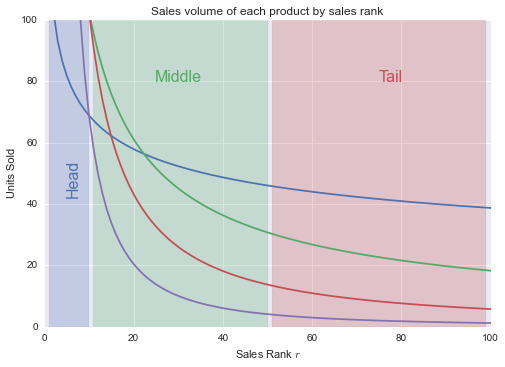

In [65]:
# Same plot as above
for nn in ns:
    norm = (nn-1)*volume/(1-inventory**(1-nn))
    pl.plot(rr, norm/rr**nn, label='$n=%g$' % nn)

pl.ylim(0,100)
pl.xlabel('Sales Rank $r$')
pl.ylabel('Units Sold')
pl.title('Sales volume of each product by sales rank')

# Add annotations
ax = pl.gca()
# Ask seaborn for some pleasing colors
c1, c2, c3 = seaborn.color_palette(n_colors=3)
# Add transparent rectangles
head_patch = pl.matplotlib.patches.Rectangle((1,0), 9, 100, alpha=0.25, color=c1)
middle_patch = pl.matplotlib.patches.Rectangle((11,0), 39, 100, alpha=0.25, color=c2)
tail_patch = pl.matplotlib.patches.Rectangle((51,0), 48, 100, alpha=0.25, color=c3)
ax.add_patch(head_patch)
ax.add_patch(middle_patch)
ax.add_patch(tail_patch)
# Add text annotations
ax.text(5,50,"Head", color=c1, fontsize=16, rotation=90)
ax.text(25,80,"Middle", color=c2, fontsize=16)
ax.text(75,80,"Tail", color=c3, fontsize=16)

How many units from the head, tail, and middle are sold?  Integrate over the sales rank distribution to get the sales volume in the head:

\begin{equation}
V_H = \int_1^{f_H N} \frac{A\, dr}{r^n} = \frac{V(N^{n-1} - f_H^{1-n})}{N^{n-1} - 1}
\end{equation}
where $f_H=0.1$

The volume in the tail is
\begin{equation}
V_T = \int_{f_T N}^N \frac{A\, dr}{r^n} = \frac{V(f_T^{1-n}-1)}{N^{n-1}-1}
\end{equation}
where $f_T=0.5$

And the middle:
\begin{equation}
V_M = \int_{f_H N}^{f_T N} \frac{A\, dr}{r^n} = \frac{V(f_H^{1-n} - f_T^{1-n})}{N^{n-1}-1}
\end{equation}


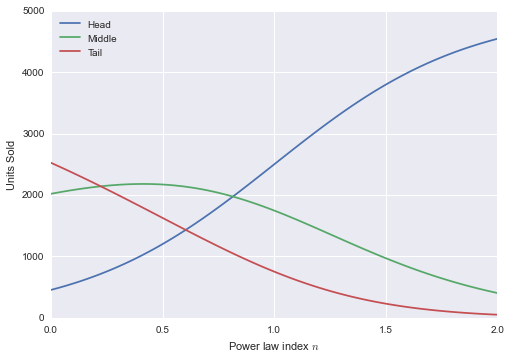

In [70]:
f_head = 0.1
f_tail = 0.5

ns = np.linspace(0,2,100)
nm1 = ns-1.0

head = volume*(inventory**nm1 - f_head**-nm1)/(inventory**nm1-1)
middle = volume*(f_head**-nm1 - f_tail**-nm1)/(inventory**nm1-1)
tail = volume*(f_tail**-nm1 - 1)/(inventory**nm1-1)

pl.plot(ns, head, label='Head')
pl.plot(ns, middle, label='Middle')
pl.plot(ns, tail, label='Tail')
pl.legend(loc='upper left')
pl.ylabel('Units Sold')
pl.xlabel('Power law index $n$')

For $n>1$, the head has most of value.  As $n$ falls, the middle and tail become important.

How many styles of clothing should we carry?
--

We can choose expand our inventory from $N$ to $N+1$ styles of clothing.  How many additional units will we sell?

This is just the sales volume distribution $n(r)$ evaluated at $r=N+1$

\begin{equation}
\frac{d V}{d N} = \frac{(n-1) V}{(1-N^{1-n})(N+1)^n} 
\end{equation}


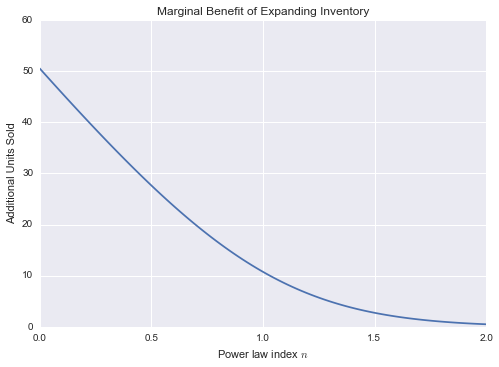

In [75]:
marginal_benefit = ((ns-1)*volume)/((1-inventory**(1-ns))*(inventory+1)**ns)

pl.plot(ns, marginal_benefit)
pl.ylabel('Additional Units Sold')
pl.xlabel('Power law index $n$')
pl.title('Marginal Benefit of Expanding Inventory')

Our scaled down version of Stitch Fix can expect to sell an additional $\simeq 40$ pieces of clothing per year if the sales distribution has $n=0.25$, or an additional $\simeq 3$ units per year if $n=1.5$  Whether expanding the inventory is worth it to get those additional sales depends entirely on how much it costs to bring one additional product into the inventory.
